In [1]:
import tensorflow as tf
print(tf.__version__)
print(tf.test.is_gpu_available())

2.0.0
False


In [2]:
import warnings
warnings.filterwarnings(action='ignore')

import os

import numpy as np
import pandas as pd
import seaborn as sb

from tensorflow.keras.models import Sequential  # class
from tensorflow.keras.models import load_model  # model 사용
from tensorflow.keras.layers import Dense       # 전결합
from tensorflow.keras.layers import Dropout     # 특정 node를 사용안함.
from tensorflow.keras.callbacks import EarlyStopping   # 학습 자동 중지
from tensorflow.keras.callbacks import ModelCheckpoint # 우수한 학습 모델 파일 저장
from tensorflow.keras import regularizers 
from tensorflow.keras.utils import to_categorical   # one-hot 엔코딩

from tensorflow.keras.datasets import mnist

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split # 학습셋과 테스트셋의 분리 지원
from sklearn.model_selection import StratifiedKFold  # K겹 교차 검증

import matplotlib.pyplot as plt
from matplotlib import font_manager, rc

font_name = font_manager.FontProperties(fname="C:/Windows/Fonts/malgun.ttf").get_name()
# windows 10
# font_name = font_manager.FontProperties(fname="C:/Windows/Fonts/malgunsl.ttf").get_name()
rc('font', family=font_name)           # 맑은 고딕 폰트 지정
plt.rcParams["font.size"] = 12         # 글자 크기
# plt.rcParams["figure.figsize"] = (10, 4) # 10:4의 그래프 비율
plt.rcParams['axes.unicode_minus'] = False  # minus 부호는 unicode 적용시 한글이 깨짐으로 설정

%matplotlib inline  

In [3]:
(x_train, y_train), (x_test, y_test)  = mnist.load_data()

In [4]:
print(x_train.shape) # 면, 행, 열
print(y_train.shape) # 면, 행, 열
print(x_test.shape) # 면, 행, 열
print(y_test.shape) # 면, 행, 열
print(x_train[0].shape)
print(type(x_train[0]))

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)
(28, 28)
<class 'numpy.ndarray'>


In [5]:
# print(x_train[0])
for row in x_train[0]:
    for col in row:
        print('{0:3d}'.format(col), end='')
    print('') # 하나의 행이 출력되면 라인 변경 

  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  3 18 18 18126136175 26166255247127  0  0  0  0
  0  0  0  0  0  0  0  0 30 36 94154170253253253253253225172253242195 64  0  0  0  0
  0  0  0  0  0  0  0 49238253253253253253253253253251 93 82 82 56 39  0  0  0  0  0
  0  0  0  0  0  0  0 18219253253253253253198182247241  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0 80156107253253205 11  0 43154  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0 14  1154253 90  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0139253190  2  0  0  0  0  0  0  

class: 5


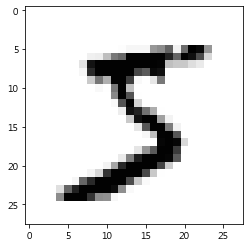

In [6]:
print('class:', y_train[0])
plt.imshow(x_train[0], cmap='Greys') # pixel 배열 -> image
plt.show()

In [7]:
(x_train, y_train), (x_test, y_test)  = mnist.load_data()

# 차원 변환 과정
# 60,000개의 28x28개 3차원 데이터를 
# 60,000개의 784개 2차원 데이터로 변경
print('shape[0]:', x_train.shape[0]) # 면, 이미지의 갯수 60,000
print(x_train.shape[1]) # 행
print(x_train.shape[2]) # 열
x_train = x_train.reshape(x_train.shape[0], 784) # 60000행  X 784열
x_train = x_train.astype('float64') # 실수로 변환
x_train = x_train / 255 # 0 ~ 1 정규화, GPU는 실수 처리에 최적화

x_test = x_test.reshape(x_test.shape[0], 784).astype('float64') / 255 # 10000 X 784


shape[0]: 60000
28
28


In [9]:
print(y_train[0:10])
print(y_train.shape)

[5 0 4 1 9 2 1 3 1 4]
(60000,)


In [10]:
y_train = to_categorical(y_train, 10) # one-hot encoding